# Контрольное домашнее задание № 1.2
# Вариант 2

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [110]:
from prettytable import PrettyTable

## Задание:

Дана многокритериальная аналитическая задача:

$J_1(u) = 0.2(u_1 - 70)^2 + 0.8(u_2 - 20)^2 → min$

$J_2(u) = 0.2(u_1 - 10)^2 + 0.8(u_2 - 70)^2 → min$

Множество допустимых решений D:
    \begin{cases}
    0 ≤ u_1 ≤ 79 \\     
    0 ≤ u_2 ≤ 79  \\
\end{cases}


## Решение:

### 1. Генерируется 100 точек, равномерно распределенных на множестве D 

In [111]:
class tochka(object):
    def __init__(self, x, y, pareto='0', omega='0'):
        self.x = x
        self.y = y
        self.pareto = pareto
        self.omega = omega

In [112]:
count = 0
number = 100
# number = int(input("Введите количество точек: "))


dots = []
for i in range(number):
    dots.append(tochka(0, 0))

j1, j2 = [], []

In [113]:
# проверка на уникальность точки
def check(x1, y1, x, y): 
    for i in range(len(x)):
        if x1 == x[i] and y1 == y[i]:
            return False
    return True

In [114]:
# генератор случайных точек
while count < number:
    u1 = np.random.uniform(0, 79)
    u2 = np.random.uniform(0, 79)
    
    temp1 = 0.2 * (u1 - 70)**2 + 0.8 * (u2 - 20)**2
    temp2 = 0.2 * (u1 - 10)**2 + 0.8 * (u2 - 70)**2
    
    if check(temp1, temp2, j1,j2):
            j1.append(temp1)
            j2.append(temp2)                   
            count = count + 1
#             print(count, '-', u1, u2)


In [115]:
for i in range(number):
    dots[i].x = round(j1[i], 3)
    dots[i].y = round(j2[i], 3)
#     print(i, '-', dots[i].x, dots[i].y)
    

Text(0, 0.5, 'J2')

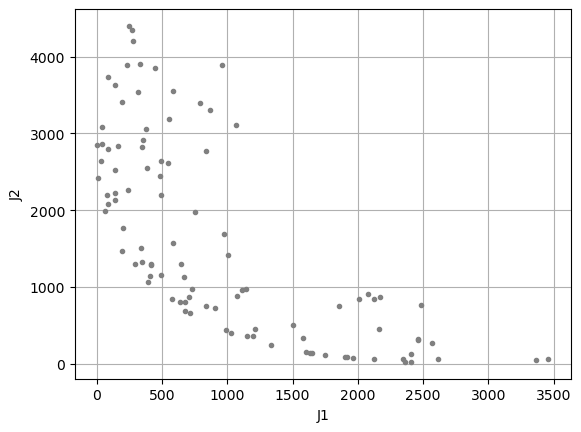

In [116]:
# визуализация
for i in range(number):
    plt.plot(dots[i].x, dots[i].y, '.', color='grey')

plt.grid()
plt.xlabel('J1')
plt.ylabel('J2')

### 2. Строится множество Парето-оптимальных решений

In [117]:
def pareto_optimum():
     for i in range(number):
        for j in range(number):
            if ((dots[i].x >= dots[j].x) and (dots[i].y > dots[j].y)) or ((dots[i].x > dots[j].x) and (dots[i].y >= dots[j].y)):
                dots[i].pareto = '1'
    

Статус '1' присваивается НЕ Парето-оптимальным решениям

In [118]:
pareto_optimum()

In [119]:
pt1 = PrettyTable()
count = 0
pt1.field_names=['id', 'f1', 'f2']
for i in range(number):
    if dots[i].pareto == '0':
        pt1.add_row([i + 1, dots[i].x, dots[i].y])
        count += 1
print('Всего Парето-оптимальных точек -', count)
print(pt1)

Всего Парето-оптимальных точек - 22
+----+----------+----------+
| id |    f1    |    f2    |
+----+----------+----------+
| 5  | 1337.955 | 243.596  |
| 6  | 672.438  | 689.815  |
| 7  | 2124.177 |  56.751  |
| 11 | 2342.632 |  56.257  |
| 13 | 291.824  | 1305.606 |
| 14 | 2359.365 |  24.642  |
| 16 | 1747.796 | 111.529  |
| 19 | 389.105  | 1060.243 |
| 21 | 1964.819 |  71.927  |
| 22 | 1600.345 | 148.694  |
| 25 | 1635.025 | 141.552  |
| 32 | 636.508  |  803.13  |
| 35 |  2.863   | 2850.73  |
| 40 | 194.073  | 1473.986 |
| 42 | 986.978  | 440.292  |
| 47 | 1025.064 | 407.655  |
| 50 |  61.24   | 1986.615 |
| 68 | 1150.542 | 363.827  |
| 72 | 1905.376 |  91.78   |
| 75 |  9.196   | 2413.445 |
| 82 | 716.829  | 665.064  |
| 84 | 579.005  | 840.372  |
+----+----------+----------+


In [120]:
def pareto_show():
       
    for i in range(number):
        if dots[i].pareto == '0':
            plt.plot(dots[i].x, dots[i].y, '.', color='black')
        else:
            plt.plot(dots[i].x, dots[i].y, '.', color='gray')
        
        if number <= 20:
            plt.text(dots[i].x + 0.1, dots[i].y + 0.1, i + 1)
    
    plt.grid(True)
    plt.xlabel('J1')
    plt.ylabel('J2')
    plt.suptitle('Graf')

    plt.show()

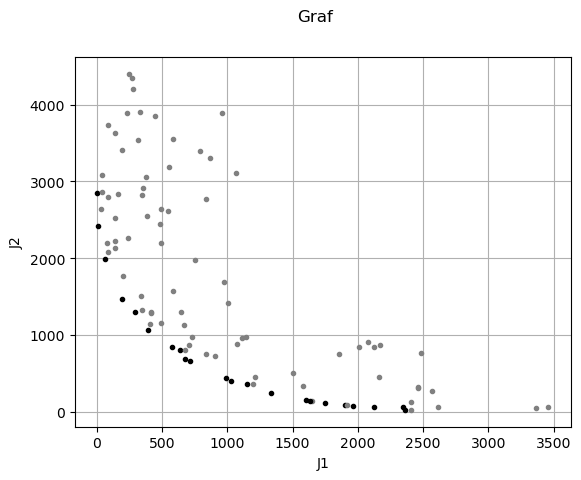

In [121]:
pareto_show()

### 3. На множестве Парето выделяется множество Ω-оптимальных решений. 

In [122]:
def gray_code(n):
    '''
    Функция для вычисления кода Грея для заданного числа
    '''
    if n == 1:
        return ['0', '1']
    else:
        prev = gray_code(n-1)
        return ['0' + x for x in prev] + ['1' + x for x in reversed(prev)]

In [123]:
n = 2
# n = int(input('Введите размерность пространства: '))
g_code = gray_code(n)

In [124]:
g_code

['00', '01', '11', '10']

Ввод весовых коэффициентов

In [125]:
# list_v = []
# for i in range(n):
#     print(i+1)
#     list_v.append([float(input('Введите min:')), float(input('Введите max:'))])


In [126]:
list_v = [[0.3, 0.6], [0.4, 0.7]]
list_v

[[0.3, 0.6], [0.4, 0.7]]

In [127]:
def make_mu_matrix(grey_code_matrix):
    '''
    Функция сопоставляет каждой вершине код Грея
    '''
    mu_matrix = []
    for i in range(len(grey_code_matrix)):
        row=[]
        for j in range(len(grey_code_matrix[i])):
            row.append(None)
        mu_matrix.append(row)

    for i in range(len(grey_code_matrix)):
        if grey_code_matrix[i][0] == '0':
            mu_matrix[i][0] = list_v[0][0]
        else:
            mu_matrix[i][0] = list_v[0][1]

        if grey_code_matrix[i][1] == '0':
            mu_matrix[i][1] = list_v[1][0]
        else:
            mu_matrix[i][1] = list_v[1][1]

    return mu_matrix



In [128]:
make_mu_matrix(g_code)


[[0.3, 0.4], [0.3, 0.7], [0.6, 0.7], [0.6, 0.4]]

In [129]:
def find_points():
    '''
    Функция точки пересечения прямой y = x-1 и ребер
    '''
    mu_matrix = make_mu_matrix(g_code)
    B = []
    for i in range(len(mu_matrix) - 1):
        L_mu = (mu_matrix[i][0] + mu_matrix[i][1] - 1) * (mu_matrix[i+1][0] + mu_matrix[i+1][1] - 1)
        if(L_mu <= 0):
            if(mu_matrix[i][0] == mu_matrix[i+1][0]):
                x = mu_matrix[i][0]
                y = round(-x+1,5)
                B.append((x, y))
            elif(mu_matrix[i][1] == mu_matrix[i+1][1]):
                y = mu_matrix[i][1]
                x = round(-y+1,5)
                B.append((x, y))

    last_el_index = len(mu_matrix) - 1
    L_mu = (mu_matrix[last_el_index][0] + mu_matrix[last_el_index][1] - 1) * (mu_matrix[0][0] + mu_matrix[0][1] - 1)
    if (L_mu <= 0):
        if (mu_matrix[last_el_index][0] == mu_matrix[0][0]):
            x = mu_matrix[last_el_index][0]
            y = round(-x + 1, 5)
            B.append((x, y))
        elif (mu_matrix[last_el_index][1] == mu_matrix[0][1]):
            y = mu_matrix[last_el_index][1]
            x = round(-y + 1, 5)
            B.append((x, y))

    B = list(dict.fromkeys(B))
    return(B)

In [130]:
# B = [[0.3, 0.7], [0.4, 0.6]]
B = find_points()
B

[(0.3, 0.7), (0.6, 0.4)]

In [131]:
def omega_optimum():
    for i in range(number):
        for j in range(number):
            if j != i and dots[j].pareto == '0':
                k1 = B[0][0] * (j1[i] - j1[j]) + B[1][0] * (j2[i] - j2[j])
                k2 = B[0][1] * (j1[i] - j1[j]) + B[1][1] * (j2[i] - j2[j])
                if k1 <= 0 and k2 <= 0 and k1 != k2:
                    dots[j].omega = '1'



Статус '-1' присваивается НЕ Омега-оптимальным точкам, эти точки выбираются и множества Парето-оптимальных точек

In [132]:
omega_optimum()

In [133]:
pt2 = PrettyTable()
count = 0
pt2.field_names=['id', 'f1', 'f2']
for i in range(number):
    if dots[i].pareto == '0' and dots[i].omega == '0':
        pt2.add_row([i + 1, dots[i].x, dots[i].y])
        count += 1
print('Всего Омега-оптимальных точек -', count)
print(pt2)

Всего Омега-оптимальных точек - 7
+----+----------+----------+
| id |    f1    |    f2    |
+----+----------+----------+
| 5  | 1337.955 | 243.596  |
| 6  | 672.438  | 689.815  |
| 19 | 389.105  | 1060.243 |
| 42 | 986.978  | 440.292  |
| 47 | 1025.064 | 407.655  |
| 82 | 716.829  | 665.064  |
| 84 | 579.005  | 840.372  |
+----+----------+----------+


In [134]:
def omega_show():       
    for i in range(number):
        if dots[i].pareto == '0' and dots[i].omega == '1':
            plt.plot(dots[i].x, dots[i].y, '.', color='black')
        elif dots[i].pareto == '0' and dots[i].omega == '0':
            plt.plot(dots[i].x, dots[i].y, 'o', color='red')
        else:
            plt.plot(dots[i].x, dots[i].y, '.', color='grey')
        
        if number <= 20:
            plt.text(dots[i].x + 0.1, dots[i].y + 0.1, i + 1)
    
    
    
    plt.grid(True)
    plt.xlabel('J1')
    plt.ylabel('J2')
    plt.suptitle('Graf')

    plt.show()

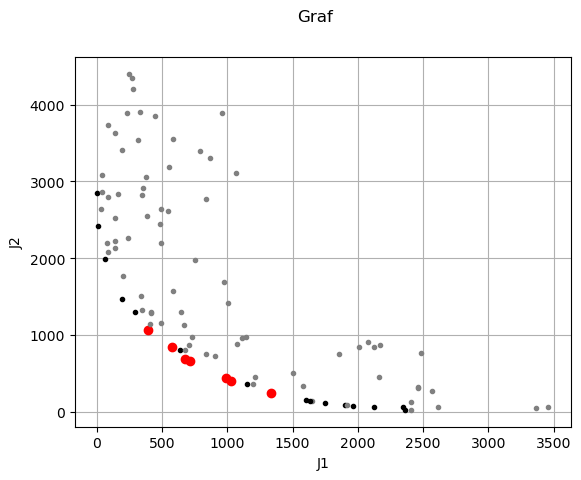

In [135]:
omega_show()

# Done!